# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [1]:
import numpy as np
clock_size = 5  # i
T = 86400 * 30
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

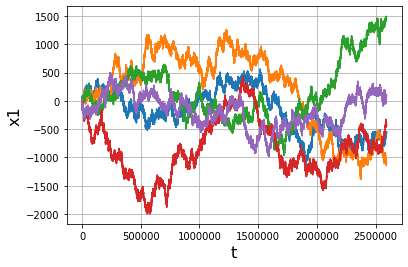

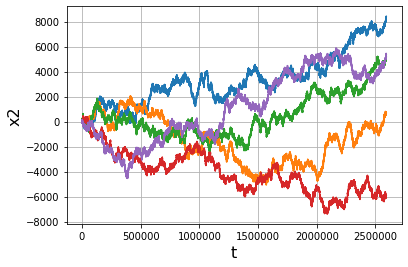

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta1 = 1
delta2 = 3
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size
# Create an empty array to store the realizations.
x1 = np.empty((m,N+1))
x2 = np.empty((m,N+1))
# Initial values of x, x0
x1[:, 0] = 0
x2[:, 0] = 0

brownian(x1[:,0], N, dt, delta1, out=x1[:,1:])
brownian(x2[:,0], N, dt, delta2, out=x2[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)

for k in range(m):
    plot(t_all, x1[k])
xlabel('t', fontsize=16)
ylabel('x1', fontsize=16)
grid(True)
show()

for k in range(m):
    plot(t_all, x2[k])
xlabel('t', fontsize=16)
ylabel('x2', fontsize=16)
grid(True)
show()

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x1[:,:-1]
w2_square_sum = x2[:,:-1]

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
print(w2_square_sum)

[[ 0.00000000e+00  6.65829951e-02 -2.69991374e-01 ...  8.49197126e+09
   8.49197968e+09  8.49198810e+09]
 [ 0.00000000e+00 -6.08737403e-01 -5.90061757e-01 ... -3.84879248e+09
  -3.84879182e+09 -3.84879116e+09]
 [ 0.00000000e+00  4.21407169e+00  7.59745741e+00 ...  1.20662061e+09
   1.20662579e+09  1.20663097e+09]
 [ 0.00000000e+00 -2.40660986e+00 -3.69492127e+00 ... -1.05305833e+10
  -1.05305892e+10 -1.05305951e+10]
 [ 0.00000000e+00 -1.49180483e+00 -6.34268066e-01 ...  3.02000323e+09
   3.02000856e+09  3.02001390e+09]]


In [7]:
print(w1)

[[ 0.00000000e+00 -9.60531619e-01 -2.86735875e-01 ... -5.49402735e+02
  -5.49783943e+02 -5.50528501e+02]
 [ 0.00000000e+00  4.20243554e-02 -5.37160442e-01 ... -1.09689140e+03
  -1.09858105e+03 -1.09879206e+03]
 [ 0.00000000e+00  2.69421527e-01  1.43186533e-01 ...  1.44288445e+03
   1.44379039e+03  1.44391951e+03]
 [ 0.00000000e+00  5.78526913e-01  1.11755022e+00 ... -4.41490676e+02
  -4.42786216e+02 -4.45071660e+02]
 [ 0.00000000e+00 -9.98571429e-03  3.54842115e-01 ...  1.05203672e+02
   1.05157893e+02  1.05125793e+02]]


In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

In [9]:
print(x_t.shape)
print(x_t[0][0:100])

(5, 2592000)
[ 0.00000000e+00 -7.45264096e-14 -5.23426896e-15  5.22992864e-14
  2.89155561e-14  1.09682212e-13  9.49566695e-15 -2.26361767e-14
 -3.34208924e-14  9.77796778e-15  1.41184861e-13  6.18598124e-14
  1.05290684e-13 -2.53046566e-14 -2.47306869e-13 -1.95237464e-13
 -2.70428300e-13 -3.57932714e-13 -2.87873940e-13 -2.13212216e-13
 -1.89163873e-13 -7.88273419e-14  4.32755286e-14  1.11101957e-13
  1.43662693e-13  1.47793585e-13  2.12244384e-13  2.86728804e-13
  2.63685957e-13  1.72023695e-13  1.38813488e-13  1.88217170e-13
  7.41538045e-14  1.87197053e-13  3.84882946e-13  3.89007882e-13
  4.89660745e-13  4.50735320e-13  5.41628127e-13  5.29328791e-13
  5.29679859e-13  5.82520131e-13  7.43250005e-13  7.71677928e-13
  6.59791509e-13  7.09506763e-13  7.73176361e-13  7.72190714e-13
  6.71454883e-13  6.14704639e-13  7.58526690e-13  9.30195024e-13
  8.13202296e-13  7.85530433e-13  9.86877622e-13  8.72480236e-13
  8.30400487e-13  9.39113528e-13  1.01842707e-12  1.05247440e-12
  1.05954757

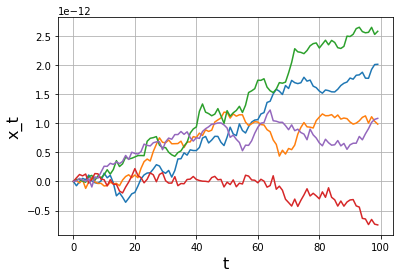

In [10]:
for k in range(x_t.shape[0]):
    plot(t[0:100], x_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [11]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

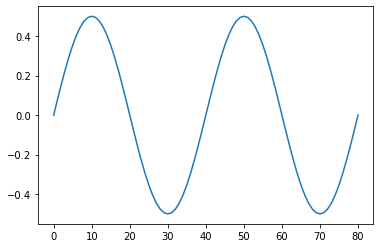

In [12]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

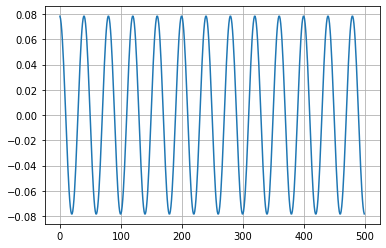

In [13]:
dx = np.diff(x_t)
dT = np.diff(delta_T)

plot(t[0:500], dT[0:500])
grid(True)
show()

Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

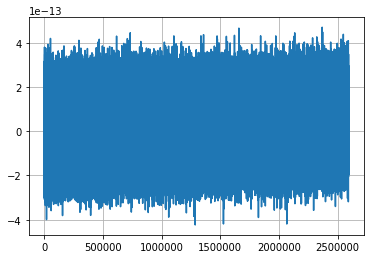

In [14]:
plot(dx[0])
grid(True)
show()

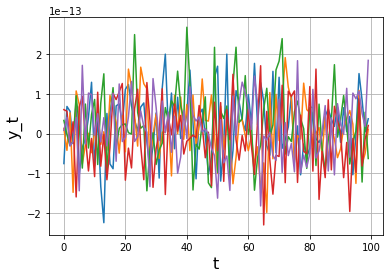

In [15]:
for k in range(Y_t.shape[0]):
    #plot(t[:-1], Y_t[k])
    plot(t[0:100], Y_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('y_t', fontsize=16)
grid(True)
show()

#### 2.4 保存模拟数据

In [16]:
# with open('simulated_data.npy', 'wb') as f:
#     np.save(f, Y_t)
np.savetxt("0-cov.csv", dx, delimiter=",")
np.savetxt("5-cov.csv", Y_t, delimiter=",")
print("Simulated Data saved as '0-cov.csv' and '5-cov.csv'")

Simulated Data saved as 'simulated_data.npy'


#### 3. 计算Gamma，并绘制 figure 3

#### 3.1 每两台钟，做差并计算allan variance

In [17]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

# Note: we are interested in tau from 2^8 to 2^18. Here we plot tau from 2^0 to 2^19

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [1.24530128e-13 8.79674620e-14 6.21938806e-14 4.40420757e-14
 3.10686166e-14 2.19410119e-14 1.55880274e-14 1.10469204e-14
 7.71737094e-15 5.40213675e-15 3.91239476e-15 2.82098147e-15
 2.20991887e-15 1.87184676e-15 2.08580495e-15 2.73353118e-15
 3.65526460e-15 4.80805010e-15 7.19858294e-15 9.99076267e-15]


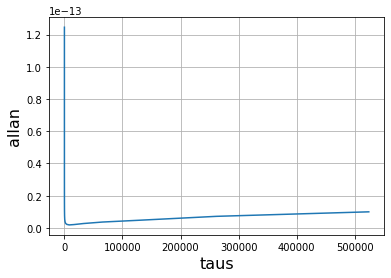

In [18]:
delta_01 = Y_t[0] - Y_t[1]
# Calculate Allan variance
(taus, adevs_01, errors, ns) = allantools.adev(data=delta_01, data_type='freq')
print('taus - %s, adevs - %s' % (taus, adevs_01))

plot(taus, adevs_01)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [1.24533241e-13 8.80966237e-14 6.23026071e-14 4.39822036e-14
 3.11755313e-14 2.19440631e-14 1.55841814e-14 1.11045840e-14
 7.91016266e-15 5.62109236e-15 4.06688033e-15 2.79769479e-15
 2.15538554e-15 1.81839973e-15 1.98833527e-15 2.46225525e-15
 3.45262748e-15 3.75134587e-15 4.92776928e-15 7.79657561e-15]


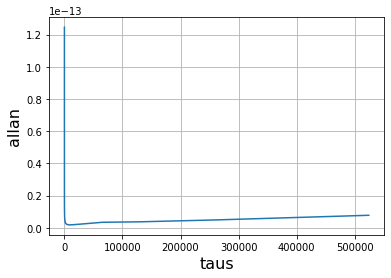

In [19]:
delta_02 = Y_t[0] - Y_t[2]
# Calculate Allan variance
(taus, adevs_02, errors, ns) = allantools.adev(data=delta_02, data_type='freq')
print('taus - %s, adevs - %s' % (taus, adevs_02))

plot(taus, adevs_02)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()